# Case Study Sales - Time Series Forecasting

Analysis of a company's sales data, including seasonal effects. I ask and try to answer questions like:
- Can we predict future sales data from past sales data?
- What will sales look like in the future?

Methods employed:
- Analysis of data

Tools and frameworks that I used:
- Pandas
- Numpy
- Matplotlib, Seaborn

*Data and inspiration from: https://www.udemy.com/course/data-science-for-business-6-real-world-case-studies/*

## 1. Import, analyze and pre-clean data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#import sklearn

pd.options.display.float_format = '{:,.2f}'.format
#pd.reset_option('display.float_format')
#pd.set_option('precision', 2)
#pd.reset_option('precision')

df_store_info = pd.read_csv('store.csv')
df_train_sales = pd.read_csv('train.csv')

C:\Users\Johannes\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_train_sales.sample(5)
df_train_sales.info()
df_train_sales.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
905316,722,4,2013-04-11,10027,1555,1,1,0,0
927649,755,5,2013-03-22,11822,968,1,1,0,0
566557,923,7,2014-02-09,0,0,0,0,0,0
150289,880,4,2015-03-19,8058,885,1,1,0,0
827873,214,3,2013-06-19,8518,651,1,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.02e+06,1.02e+06,1.02e+06,1.02e+06,1.02e+06,1.02e+06,1.02e+06
mean,5.58e+02,4.00e+00,5.77e+03,6.33e+02,8.30e-01,3.82e-01,1.79e-01
std,3.22e+02,2.00e+00,3.85e+03,4.64e+02,3.76e-01,4.86e-01,3.83e-01
min,1.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
25%,2.80e+02,2.00e+00,3.73e+03,4.05e+02,1.00e+00,0.00e+00,0.00e+00
50%,5.58e+02,4.00e+00,5.74e+03,6.09e+02,1.00e+00,0.00e+00,0.00e+00
75%,8.38e+02,6.00e+00,7.86e+03,8.37e+02,1.00e+00,1.00e+00,0.00e+00
max,1.12e+03,7.00e+00,4.16e+04,7.39e+03,1.00e+00,1.00e+00,1.00e+00


In [3]:
df_store_info.sample(5)
df_store_info.info()
df_store_info.describe()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
704,705,a,a,4140.0,9.0,2012.0,1,18.0,2011.0,"Feb,May,Aug,Nov"
425,426,a,a,250.0,NaN,NaN,0,NaN,NaN,NaN
318,319,a,c,570.0,9.0,2012.0,1,27.0,2012.0,"Mar,Jun,Sept,Dec"
609,610,a,a,660.0,1.0,2007.0,0,NaN,NaN,NaN
667,668,c,a,1270.0,9.0,2010.0,0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


#### Observations
- Average distance to competition stores: 5.4 km
- Half of the stores participate in promo2 activities

### Find missing data for df_train_sales
- No missing data points found via heatmap

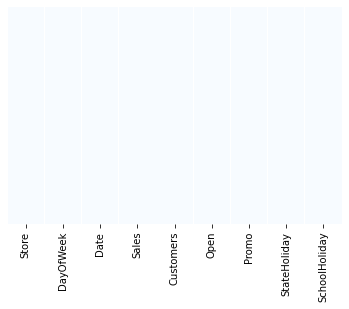

In [65]:
sns.heatmap(df_train_sales.isnull(), yticklabels=False, cbar=False, cmap='Blues');

### Distribution
- All stores contribute approximately same amount of data
- ~600 customers per day
- Stores are open ~ 80% of time
- Promo1 was running ~39% of time
- Average sales ~ 6000 €

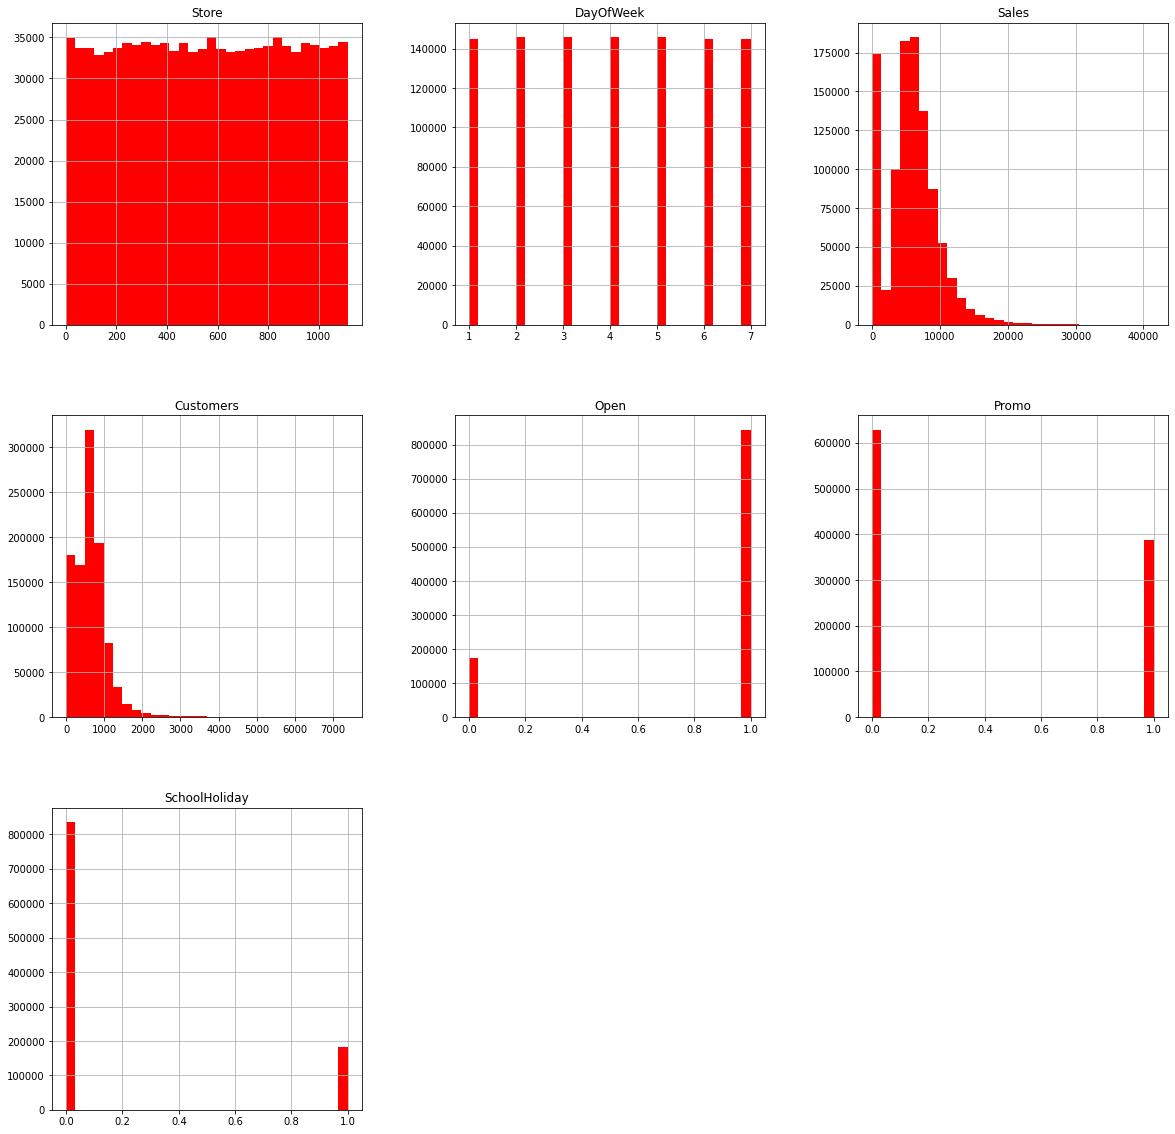

In [5]:
df_train_sales.hist(bins=30, figsize=(20,20), color='r');

In [66]:
print('Max. customers: ',df_train_sales.Customers.max())

df_train_closed = df_train_sales[df_train_sales['Open'] == 0]
df_train_open = df_train_sales[df_train_sales['Open'] == 1]
print('\nTotal stores: ', len(df_train_sales))
print('Closed stores: ', len(df_train_closed))
print('Open stores: ', len(df_train_open))

df_train_open.drop(['Open'], axis=1, inplace=True)
df_train_open.describe()

Max. customers:  7388

Total stores:  1017209
Closed stores:  172817
Open stores:  844392


C:\Users\Johannes\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,"844,392.00","844,392.00","844,392.00","844,392.00","844,392.00","844,392.00"
mean,558.42,3.52,"6,955.51",762.73,0.45,0.19
std,321.73,1.72,"3,104.21",401.23,0.50,0.40
min,1.00,1.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,"4,859.00",519.00,0.00,0.00
50%,558.00,3.00,"6,369.00",676.00,0.00,0.00
75%,837.00,5.00,"8,360.00",893.00,1.00,0.00
max,"1,115.00",7.00,"41,551.00","7,388.00",1.00,1.00


#### Observations
- Analysing only data from open stores corrects averaged data
- Customer average increased to 763
- Sales average increased to ~7000 €

### Find missing data for df_store_info

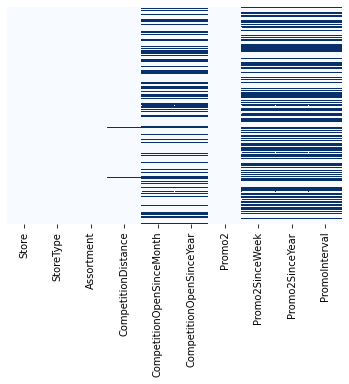

In [67]:
sns.heatmap(df_store_info.isnull(), cbar=False, cmap='Blues', yticklabels=False);

In [68]:
df_store_info[df_store_info['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,nan,nan,nan,0,nan,nan,NaN
621,622,a,c,nan,nan,nan,0,nan,nan,NaN
878,879,d,a,nan,nan,nan,1,5.00,"2,013.00","Feb,May,Aug,Nov"


In [10]:
df_store_info[df_store_info['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
df_store_info[df_store_info['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [69]:
len(df_store_info[df_store_info['Promo2SinceWeek'].isnull()])
len(df_store_info[df_store_info['Promo2SinceYear'].isnull()])
len(df_store_info[df_store_info['PromoInterval'].isnull()])
df_store_info[df_store_info['Promo2SinceWeek'].isnull() & df_store_info['Promo2SinceYear'].isnull() & df_store_info['PromoInterval'].isnull()]

544

544

544

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,"1,270.00",9.00,"2,008.00",0,nan,nan,NaN
3,4,c,c,620.00,9.00,"2,009.00",0,nan,nan,NaN
4,5,a,a,"29,910.00",4.00,"2,015.00",0,nan,nan,NaN
5,6,a,a,310.00,12.00,"2,013.00",0,nan,nan,NaN
6,7,a,c,"24,000.00",4.00,"2,013.00",0,nan,nan,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.00,4.00,"2,004.00",0,nan,nan,NaN
1109,1110,c,c,900.00,9.00,"2,010.00",0,nan,nan,NaN
1111,1112,c,c,"1,880.00",4.00,"2,006.00",0,nan,nan,NaN
1112,1113,a,c,"9,260.00",nan,nan,0,nan,nan,NaN


### Handling missing data
- CompetitionDistance only has 3 missing values --> replace NaN with average distance
- Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN, if there was no Promo2 going on (0) --> set to 0
- CompetitionOpenSinceMonth and CompetitionOpenSinceYear are NaN, if information is unknown --> set to 0

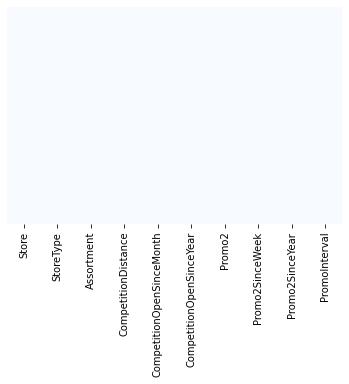

In [70]:
df_store_info['CompetitionDistance'].fillna(df_store_info['CompetitionDistance'].mean(), inplace=True)

zero_columns = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
for column in zero_columns:
    df_store_info[column].fillna(0, inplace=True)

sns.heatmap(df_store_info.isnull(), cbar=False, cmap='Blues', yticklabels=False);

#### Distribution
- All stores contribute approximately same amount of data
- Competition distance is mostly < 5 km
- Mostly unknown how long competition was open for
- 

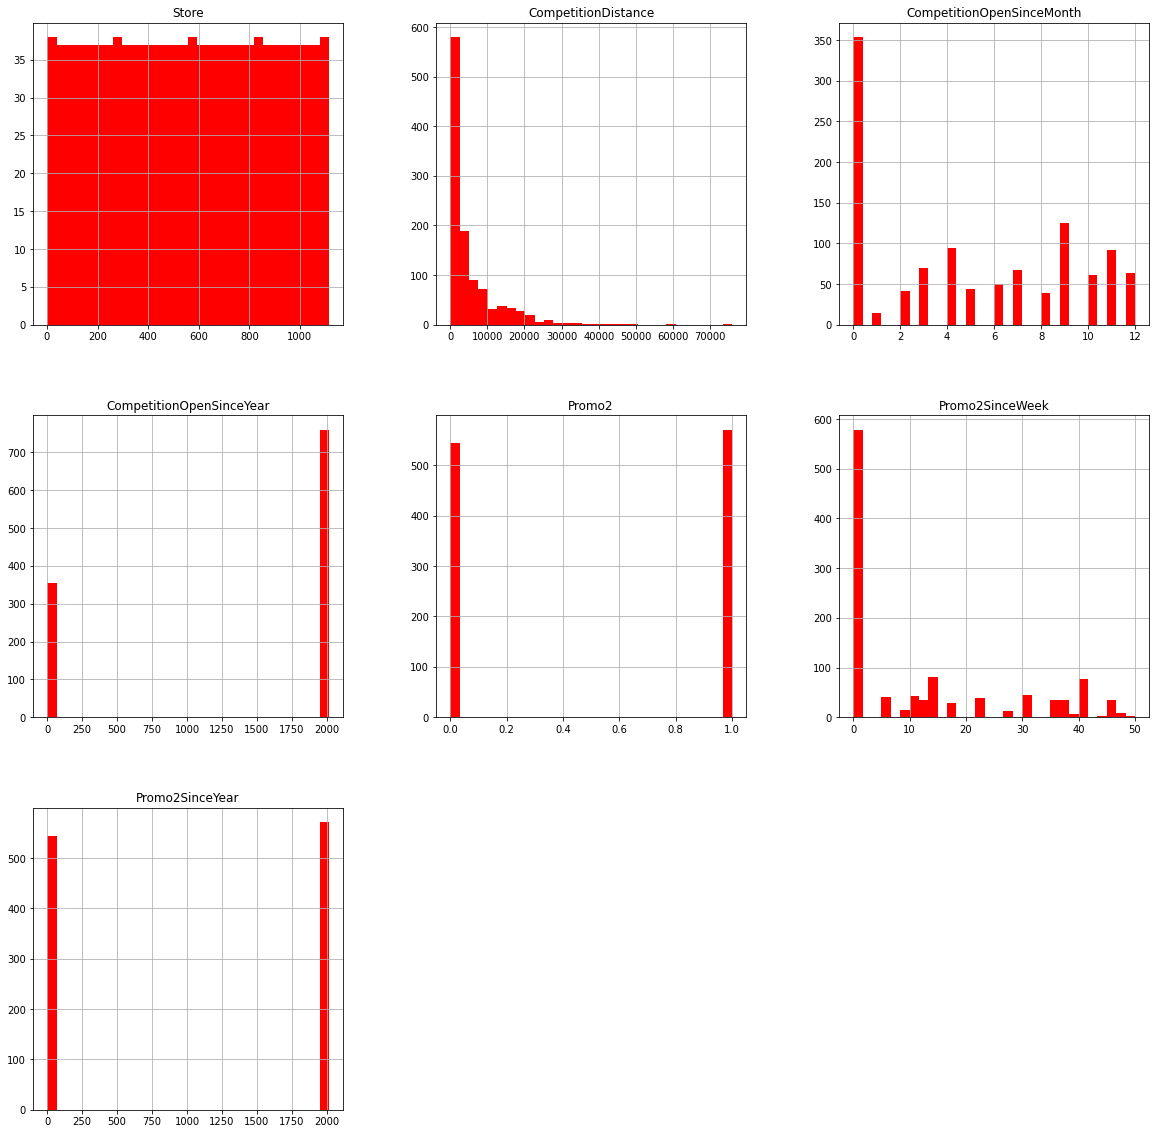

In [14]:
df_store_info.hist(bins=30,figsize=(20,20),color='r');

### Merge dataset
- Add info from df_store_info to df_train_sales, based on 'Store' ID

In [71]:
#df_total = df_train_sales.merge(on='Store', right=df_store_info)
df_total = df_train_open.merge(on='Store', right=df_store_info)
df_total.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
714582,947,3,2014-09-24,7276,1066,0,0,0,a,a,460.00,3.00,"2,014.00",1,13.00,"2,010.00","Jan,Apr,Jul,Oct"
621956,823,6,2013-01-05,3500,357,0,0,0,a,c,"16,210.00",11.00,"2,010.00",0,0.00,0.00,0
498884,661,1,2015-02-02,8158,696,1,0,0,d,c,"2,140.00",7.00,"2,013.00",0,0.00,0.00,0
597638,791,1,2013-12-23,13786,1448,0,0,1,a,a,"5,950.00",4.00,"2,007.00",0,0.00,0.00,0
714239,946,3,2013-04-17,3616,496,0,0,0,a,a,"2,220.00",12.00,"2,011.00",1,14.00,"2,015.00","Jan,Apr,Jul,Oct"


### Find correlations

Sales                        1.00
Customers                    0.82
Promo                        0.37
SchoolHoliday                0.04
Store                        0.01
CompetitionOpenSinceYear     0.01
CompetitionOpenSinceMonth   -0.02
CompetitionDistance         -0.04
Promo2SinceWeek             -0.06
Promo2                      -0.13
Promo2SinceYear             -0.13
DayOfWeek                   -0.18
Name: Sales, dtype: float64


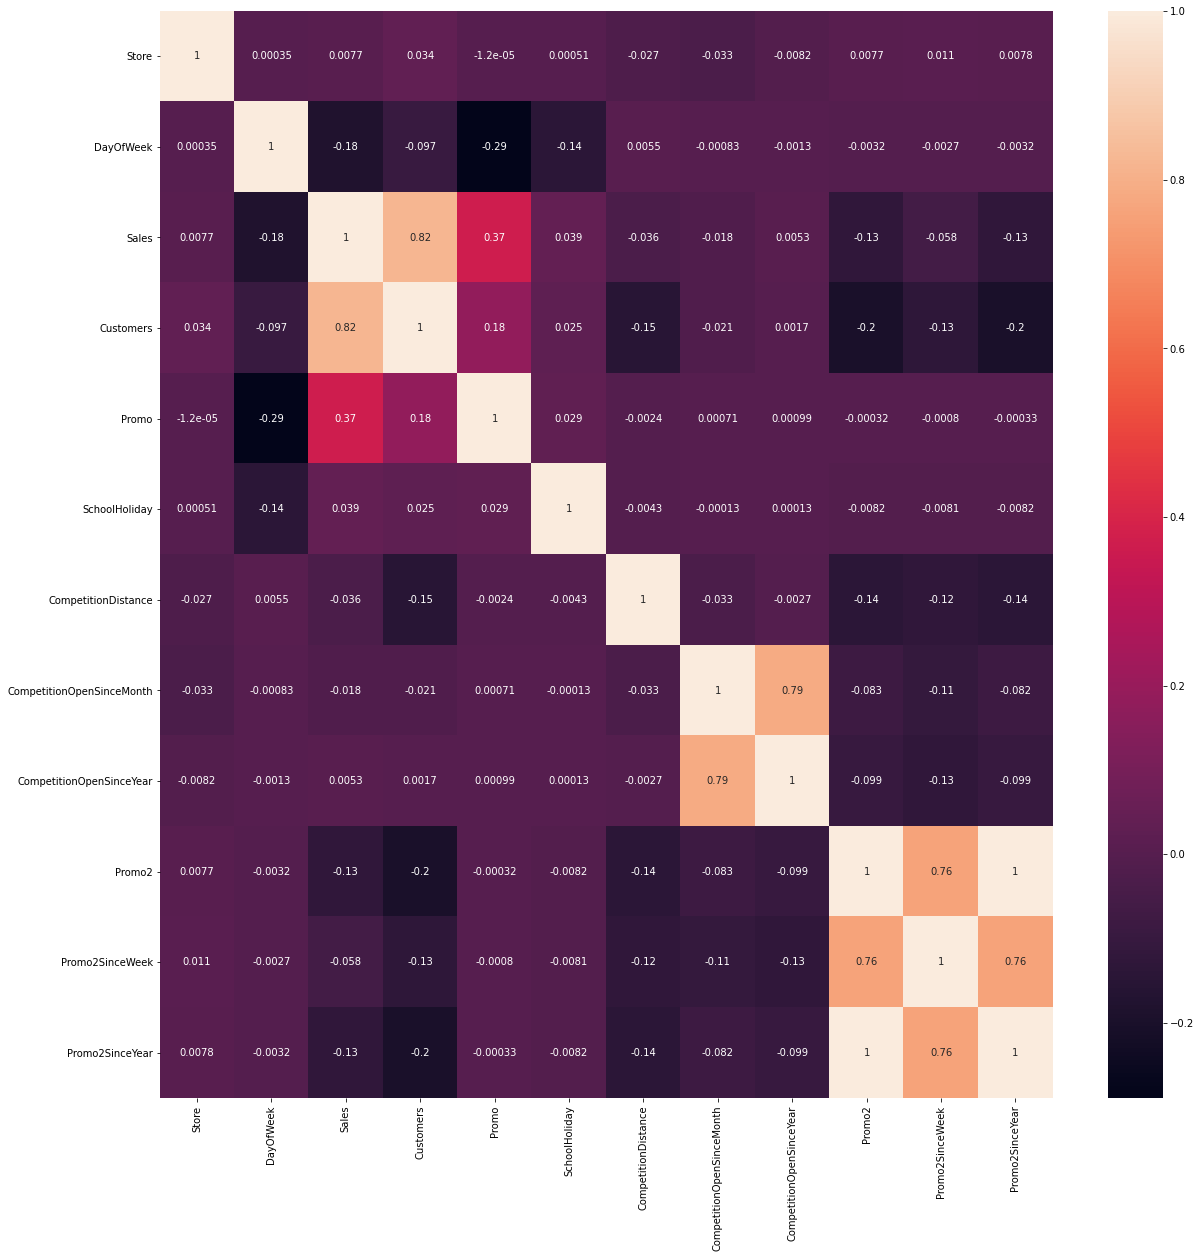

In [72]:
correlations = df_total.corr()
print(correlations['Sales'].sort_values(ascending=False))#[1:])
f, axis = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

#### Observations
- Promo (1) effectively increases sales
- Promo2 does not help sales

## 2. Visualization and Feature Engineering
- Add features for year, month and day
- Show seasonality

In [75]:
df_total['Year'] = pd.DatetimeIndex(df_total['Date']).year
df_total['Month'] = pd.DatetimeIndex(df_total['Date']).month
df_total['Day'] = pd.DatetimeIndex(df_total['Date']).day
df_total.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
333678,442,3,2013-07-17,4822,452,1,0,0,c,a,500.00,0.00,0.00,1,45.00,"2,009.00","Feb,May,Aug,Nov",2013,7,17
366997,486,4,2015-03-05,5006,619,1,0,0,a,a,"2,320.00",0.00,0.00,1,31.00,"2,013.00","Jan,Apr,Jul,Oct",2015,3,5
450151,595,4,2013-11-28,13323,1627,0,0,0,c,c,"1,130.00",6.00,"2,015.00",0,0.00,0.00,0,2013,11,28
613268,812,5,2014-05-09,7401,861,1,0,0,d,a,"2,590.00",9.00,"2,012.00",0,0.00,0.00,0,2014,5,9
764208,1012,4,2014-02-06,6632,545,1,0,0,d,c,"6,330.00",6.00,"2,004.00",1,39.00,"2,010.00","Jan,Apr,Jul,Oct",2014,2,6


In [78]:
df_total.groupby('Month')['Sales'].mean()

Month
1    6,563.69
2    6,589.17
3    6,976.41
4    7,046.23
5    7,106.45
6    7,000.98
7    6,952.68
8    6,648.98
9    6,546.34
10   6,602.84
11   7,188.55
12   8,608.96
Name: Sales, dtype: float64